In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from TSP_utils import TSP_solver, TSP_plotter, TSP_generator, TSP_loader
import numpy as np
import networkx as nx
import tqdm
import tsplib95
import time

In [3]:
loader = TSP_loader()
solver = TSP_solver()
generator = TSP_generator(g_type='tsp_2d', num_min=20, num_max=20)

In [6]:
path = 'TSPLIB samples/kroC100.tsp'
graph = loader.load_tsp_as_nx(file_path=path, scale_factor=1)

In [7]:
solver.calc_control_param_from_file(path)

0.7888544202312741

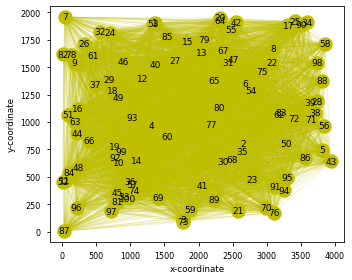

In [8]:
plotter = TSP_plotter()
plotter.plot_nx_graph(graph)

In [9]:
generator = TSP_generator(g_type='tsp_2d', num_min=20, num_max=20)

In [10]:
def calc_avg_edge_weight(g):
    num_edges = 0
    edge_weight_sum = 0
    for edge_data in g.edges(data=True):
        edge_weight_sum += edge_data[2]['weight']
        num_edges += 1
    return edge_weight_sum / num_edges

In [19]:
max_param = -np.inf
min_param = np.inf
test_time = -np.inf
for k in range(0,100):
    g = generator.gen_graph()
    start_time = time.time() 
    param = solver.calc_opt_tour_from_nx(g)[0] / (calc_avg_edge_weight(g)*g.number_of_nodes())
    # param = solver.calc_control_param_from_nx(graph=g)
    end_time = time.time() 
    if param > max_param:
        max_param = param
        max_g = g
        max_time = end_time - start_time
    if param < min_param:
        min_param = param
        min_g = g
        min_time = end_time - start_time
    if end_time - start_time > test_time:
        test_time = end_time - start_time
        test_g = g
        test_param = param
print(max_param)
print(max_time)
print(min_param)
print(min_time)
print(test_param)
print(test_time)

0.4606853708469789
0.01981329917907715
0.2776606588685448
0.013061761856079102
0.3562014920861091
0.04619646072387695


In [13]:
test_graph = test_g
solver.calc_opt_tour_from_nx(test_graph)[0] / (calc_avg_edge_weight(test_graph)*test_graph.number_of_nodes())

0.3842979845468543

In [14]:
solver.calc_control_param_from_nx(graph=test_graph)

1.078701027950103

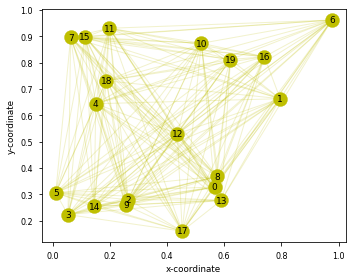

In [72]:
plotter = TSP_plotter()
plotter.plot_nx_graph(test_g)

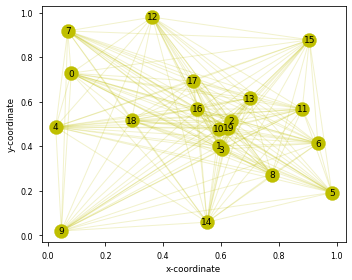

In [73]:
plotter = TSP_plotter()
plotter.plot_nx_graph(best_g)